# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
!pip install newsapi-python

In [2]:

# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = "67dcc5ce3f834d378d67f01aaa2c7e77"


In [4]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!

headlines_bitcoin = newsapi.get_everything(q="bitcoin", language="en")

In [6]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

headlines_ethereum = newsapi.get_everything(q="ethereum", language="en")

In [7]:
# Create the Bitcoin sentiment scores DataFrame
sentiments_bitcoin = []

for article in headlines_bitcoin["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        sentiments_bitcoin.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(sentiments_bitcoin)
bitcoin_df.head()


,text,compound,positive,negative,neutral
0,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876
1,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895
2,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871
3,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000
4,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831


In [8]:

# Create the Ethereum sentiment scores DataFrame
sentiments_ethereum = []

for article in headlines_ethereum["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        sentiments_ethereum.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(sentiments_ethereum)
ethereum_df.head()

,text,compound,positive,negative,neutral
0,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000
1,Hackers who made off with roughly $15 million ...,0.0000,0.000,0.000,1.000
2,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948
3,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.000,0.962
4,If people who buy cryptocurrencies intended on...,-0.2023,0.039,0.062,0.899


In [9]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

bitcoin_df.describe().T

,count,mean,std,min,25%,50%,75%,max
compound,20.0,0.13952,0.457346,-0.7096,-0.30155,0.21395,0.58590,0.7783
positive,20.0,0.08175,0.059843,0.0000,0.04325,0.06400,0.12925,0.1850
negative,20.0,0.04290,0.058105,0.0000,0.00000,0.00000,0.08850,0.1690
neutral,20.0,0.87535,0.065999,0.7290,0.83550,0.87600,0.91700,1.0000


In [10]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!

ethereum_df.describe().T

,count,mean,std,min,25%,50%,75%,max
compound,20.0,0.04249,0.292648,-0.6808,-0.1027,0.0000,0.12150,0.6808
positive,20.0,0.05000,0.052567,0.0000,0.0000,0.0435,0.05950,0.1850
negative,20.0,0.03210,0.048382,0.0000,0.0000,0.0000,0.05975,0.1740
neutral,20.0,0.91790,0.074430,0.7750,0.8755,0.9425,0.97300,1.0000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score.

Q: Which coin had the highest compound score?

A: Bitcoin has highest compound score

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addon = {'chars'}





In [13]:
# Complete the tokenizer function
def tokenizer(text):
  regex = re.compile("[^a-zA-Z ]")
  clean_text = regex.sub('', text)
  # Create a list of the words
  sentence = sent_tokenize(clean_text)
  words = []
  for sent in sentence:
    word = word_tokenize(sent)
    words = words + word    
    # Convert the words to lowercase
  words_lower = [word.lower() for word in words]    
    # Remove the stop words
  sw = set(stopwords.words('english'))
  words_sw = [word for word in words_lower if word not in sw.union(sw_addon)]
    # Lemmatize Words into root words
  tokens = [lemmatizer.lemmatize(word) for word in words_sw]
  return tokens  
   
    
    
    

In [14]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

bitcoin_df['tokens'] = [tokenizer(text) for text in bitcoin_df['text']]
bitcoin_df.head()

,text,compound,positive,negative,neutral,tokens
0,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876,"[even, arent, paying, attention, bitcoin, cryp..."
1,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895,"[el, salvador, introduced, bitcoin, legal, ten..."
2,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871,"[israeli, national, tal, prihar, pled, guilty,..."
3,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000,"[new, blog, post, company, said, eth, bitcoin,..."
4,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831,"[netflix, making, docuseries, one, worst, rapp..."


In [15]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!

ethereum_df['tokens'] = [tokenizer(text) for text in ethereum_df['text']]
ethereum_df.head()

,text,compound,positive,negative,neutral,tokens
0,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000,"[new, blog, post, company, said, eth, bitcoin,..."
1,Hackers who made off with roughly $15 million ...,0.0000,0.000,0.000,1.000,"[hacker, made, roughly, million, ethereum, cry..."
2,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948,"[level, new, mayor, simply, employing, ageold,..."
3,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.000,0.962,"[back, september, robinhood, announced, plan, ..."
4,If people who buy cryptocurrencies intended on...,-0.2023,0.039,0.062,0.899,"[people, buy, cryptocurrencies, intended, hold..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bigString = ' '.join(bitcoin_df['text'])
processed = tokenizer(bigString)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('el', 'salvador'), 3),
 (('alex', 'castro'), 3),
 (('blog', 'post'), 3),
 (('alongside', 'u'), 2),
 (('illustration', 'alex'), 2),
 (('international', 'monetary'), 2),
 (('monetary', 'fund'), 2),
 (('castro', 'vergein'), 2),
 (('new', 'blog'), 2),
 (('post', 'company'), 2)]

In [18]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

bigString = ' '.join(ethereum_df['text'])
processed = tokenizer(bigString)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('blog', 'post'), 3),
 (('new', 'blog'), 2),
 (('post', 'company'), 2),
 (('company', 'said'), 2),
 (('according', 'new'), 2),
 (('online', 'thief'), 2),
 (('thief', 'made'), 2),
 (('wrapped', 'ethereum'), 2),
 (('ethereum', 'worth'), 2),
 (('worth', 'nearly'), 2)]

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
bigString = ' '.join(bitcoin_df['text'])
processed = tokenizer(bigString)
token_count(processed)

[('bitcoin', 12),
 ('company', 6),
 ('u', 5),
 ('new', 5),
 ('el', 4),
 ('said', 4),
 ('salvador', 3),
 ('alex', 3),
 ('castro', 3),
 ('monetary', 3)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
bigString = ' '.join(ethereum_df['text'])
processed = tokenizer(bigString)
token_count(processed)

[('new', 8),
 ('cryptocurrency', 6),
 ('ethereum', 6),
 ('crypto', 6),
 ('company', 5),
 ('million', 5),
 ('blog', 3),
 ('post', 3),
 ('said', 3),
 ('made', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

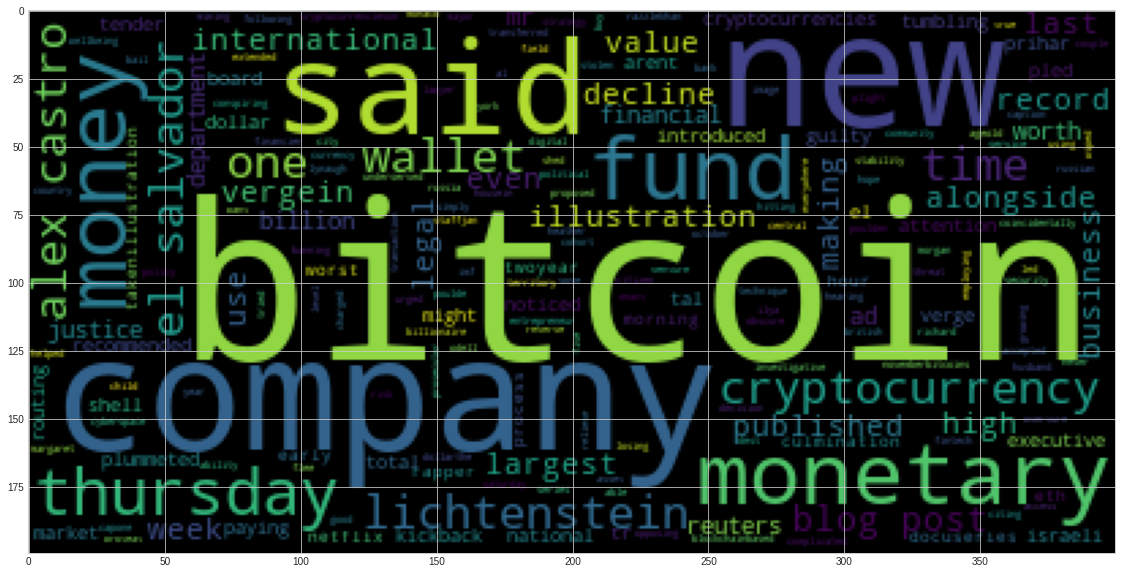

In [23]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

bigString = ' '.join(bitcoin_df['text'])
processed = tokenizer(bigString)
input_text = ' '.join(processed)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

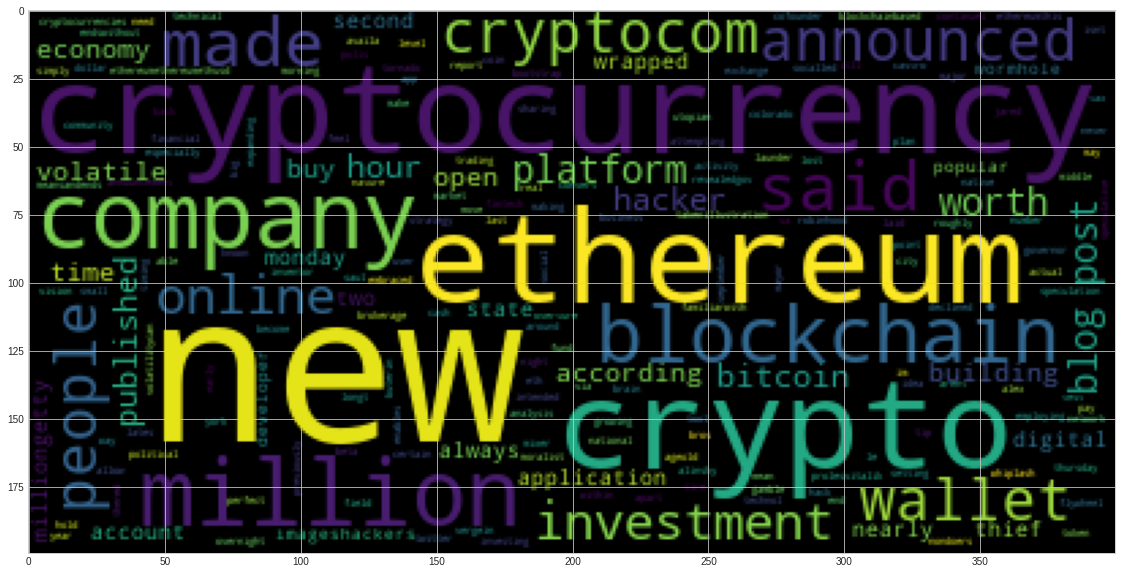

In [24]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!

bigString = ' '.join(ethereum_df['text'])
processed = tokenizer(bigString)
input_text = ' '.join(processed)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

article = ' '.join(bitcoin_df['text'])
article

'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars] El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge\r\n\n \n\n The International Monetary Fund’s executive board has recommended El … [+2691 chars] Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies \r\nIllustration by Alex Castro / The Verge\r\nIn the culmination of a two-year legal process, … [+1448 chars] In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars] Netflix\r\n is making a docuseries about one of the worst rappers of all time\r\n. Coincidentally, Heather "Razzlekhan" Morgan

In [29]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(article)




In [30]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent',jupyter=True)

In [31]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print (ent.text, ent.label_)

Bitcoin GPE
last week DATE
3 MONEY
El Salvador GPE
Bitcoin GPE
US GPE
2021 DATE
Alex Castro PERSON
The Verge

 

  PERSON
El ORG
Israeli NORP
Tal Prihar PERSON
Bitcoin GPE
Alex Castro PERSON
The Verge
 ORG
two-year DATE
4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
The Verge
 ORG
the early hours of Thursday morning TIME
Netflix
  PERSON
one CARDINAL
Ilya Lichtenstein PERSON
this week DATE
Bitcoin GPE
Saturday DATE
more than 50% PERCENT
November DATE
Bitcoin GPE
more than $ MONEY
Fintech ORG
New York City GPE
blockchain GPE
British NORP
Richard ODell Poulden PERSON
Bitcoin GPE
October DATE
Poulde PERSON
Russia GPE
Thursday DATE
Russian NORP
the last five years DATE
about 25,000 CARDINAL
Bitcoin GPE
Lichtensteins PERSON
the Department of Justice ORG
Monaco PERSON
Al Capone PERSON
the 30s DATE
Margaret Lynaugh PERSON
Bitcoin GPE
El Salvador GPE
US GPE
The International Monetary Fund ORG
El Salvador GPE
ma PERSON
Reuters ORG
Jan 26 DATE
Reuters ORG
The U.S. Securities and Exchange

---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
article = ' '.join(bitcoin_df['text'])
article


'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars] El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge\r\n\n \n\n The International Monetary Fund’s executive board has recommended El … [+2691 chars] Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies \r\nIllustration by Alex Castro / The Verge\r\nIn the culmination of a two-year legal process, … [+1448 chars] In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars] Netflix\r\n is making a docuseries about one of the worst rappers of all time\r\n. Coincidentally, Heather "Razzlekhan" Morgan

In [33]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

doc = nlp(article)

In [34]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(doc, style='ent',jupyter=True)

In [35]:
# List all Entities
# YOUR CODE HERE!

for ent in doc.ents:
    print (ent.text, ent.label_)

Bitcoin GPE
last week DATE
3 MONEY
El Salvador GPE
Bitcoin GPE
US GPE
2021 DATE
Alex Castro PERSON
The Verge

 

  PERSON
El ORG
Israeli NORP
Tal Prihar PERSON
Bitcoin GPE
Alex Castro PERSON
The Verge
 ORG
two-year DATE
4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
The Verge
 ORG
the early hours of Thursday morning TIME
Netflix
  PERSON
one CARDINAL
Ilya Lichtenstein PERSON
this week DATE
Bitcoin GPE
Saturday DATE
more than 50% PERCENT
November DATE
Bitcoin GPE
more than $ MONEY
Fintech ORG
New York City GPE
blockchain GPE
British NORP
Richard ODell Poulden PERSON
Bitcoin GPE
October DATE
Poulde PERSON
Russia GPE
Thursday DATE
Russian NORP
the last five years DATE
about 25,000 CARDINAL
Bitcoin GPE
Lichtensteins PERSON
the Department of Justice ORG
Monaco PERSON
Al Capone PERSON
the 30s DATE
Margaret Lynaugh PERSON
Bitcoin GPE
El Salvador GPE
US GPE
The International Monetary Fund ORG
El Salvador GPE
ma PERSON
Reuters ORG
Jan 26 DATE
Reuters ORG
The U.S. Securities and Exchange

---